In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

2024-03-29 21:00:57.960508: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-29 21:00:57.960642: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-29 21:00:58.092968: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
def model_lenet(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu')(inputs)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(120, activation='relu')(x)
    x = layers.Dropout(0.3)(x) 
    x = layers.Dense(84, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name='LeNet')

    return model

input_shape = (128, 128, 3) 
model = model_lenet(input_shape)

data_augmentation = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True
)

rd_lr = ReduceLROnPlateau(
    monitor='val_auc',
    factor=0.5,
    patience=10,
    verbose=1,
    mode='auto',
    min_delta=0.0001
)
callbacks = [rd_lr]

model.compile(
    optimizer=tf.optimizers.Adam(
        learning_rate=0.001,
        beta_1=0.9,
        beta_2=0.999),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC()]
)

train_data_dir = '/kaggle/input/sembansurga/train'
validation_data_dir = '/kaggle/input/sembansurga/validation'

train_generator = data_augmentation.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),  
    batch_size=120,
    class_mode='binary',
    subset='training',
    seed=42
)

validation_generator = data_augmentation.flow_from_directory(
    validation_data_dir,
    target_size=(128, 128),  
    batch_size=120,
    class_mode='binary',
    subset=None,
    seed=42
)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=callbacks
)


Found 111446 images belonging to 2 classes.
Found 27860 images belonging to 2 classes.
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/929 ━━━━━━━━━━━━━━━━━━━━ 4:38:53 18s/step - accuracy: 0.4833 - auc: 0.4976 - loss: 0.9080

I0000 00:00:1711746261.417487      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711746261.438069      74 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


246/929 ━━━━━━━━━━━━━━━━━━━━ 12:22 1s/step - accuracy: 0.6182 - auc: 0.6610 - loss: 0.6889

W0000 00:00:1711746527.693740      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


928/929 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6483 - auc: 0.6983 - loss: 0.6448

W0000 00:00:1711747270.469209      73 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


929/929 ━━━━━━━━━━━━━━━━━━━━ 1306s 1s/step - accuracy: 0.6483 - auc: 0.6983 - loss: 0.6447 - val_accuracy: 0.6942 - val_auc: 0.7557 - val_loss: 0.5892 - learning_rate: 0.0010
Epoch 2/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 747s 799ms/step - accuracy: 0.6979 - auc: 0.7565 - loss: 0.5888 - val_accuracy: 0.7044 - val_auc: 0.7686 - val_loss: 0.5821 - learning_rate: 0.0010
Epoch 3/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 708s 758ms/step - accuracy: 0.7047 - auc: 0.7651 - loss: 0.5810 - val_accuracy: 0.7095 - val_auc: 0.7735 - val_loss: 0.5746 - learning_rate: 0.0010
Epoch 4/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 719s 770ms/step - accuracy: 0.7148 - auc: 0.7740 - loss: 0.5725 - val_accuracy: 0.7139 - val_auc: 0.7724 - val_loss: 0.5739 - learning_rate: 0.0010
Epoch 5/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 711s 761ms/step - accuracy: 0.7123 - auc: 0.7745 - loss: 0.5719 - val_accuracy: 0.7186 - val_auc: 0.7805 - val_loss: 0.5651 - learning_rate: 0.0010
Epoch 6/20
929/929 ━━━━━━━━━━━━━━━━━━━━ 706s 756ms/step - accuracy: 0.717

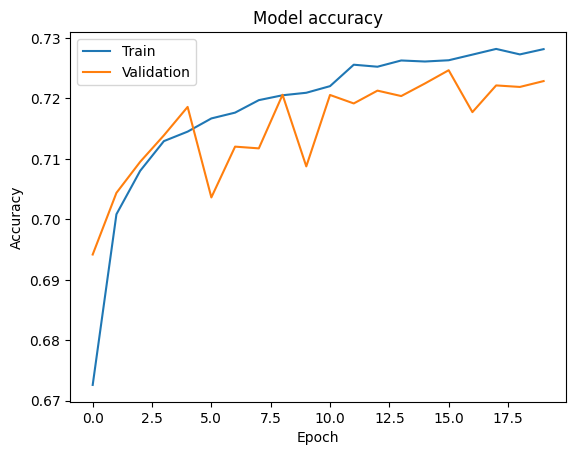

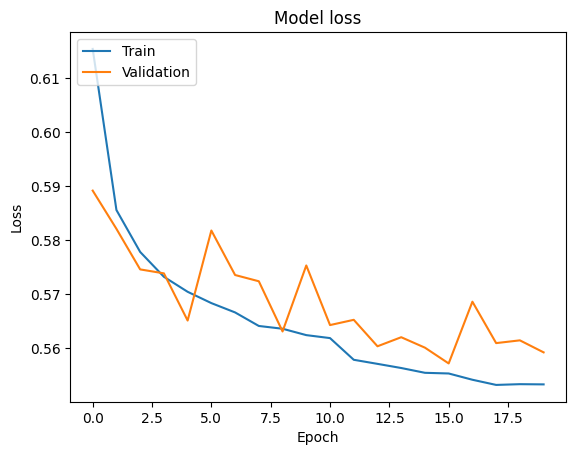

In [3]:
# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [4]:
def model_1(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), padding='same')(inputs)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(32, (3, 3), padding='same')(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2))(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name='VGG')

    return model

input_shape = (128, 128, 3)
model = model_1(input_shape)
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True
)
rd_lr = ReduceLROnPlateau(
    monitor='val_auc',
    factor=0.5,
    patience=10,
    verbose=1,
    mode='auto',
    min_delta=0.0001
)
callbacks = [rd_lr]

model.compile(
    optimizer=tf.optimizers.Adam(
        learning_rate=0.001,
        beta_1=0.9,
        beta_2=0.999),
    loss="binary_crossentropy",
    metrics=["accuracy", tf.keras.metrics.AUC()]
)

train_data_dir = '/kaggle/input/sembansurga/train'
validation_data_dir = '/kaggle/input/sembansurga/validation'

train_generator = data_augmentation.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    batch_size=96,
    class_mode='binary',
    subset='training',
    seed=42
)

validation_generator = data_augmentation.flow_from_directory(
    validation_data_dir,
    target_size=(128, 128),
    batch_size=120,
    class_mode='binary',
    subset=None,
    seed=42
)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    callbacks=callbacks
)

Found 111446 images belonging to 2 classes.
Found 27860 images belonging to 2 classes.
Epoch 1/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 797s 656ms/step - accuracy: 0.6469 - auc_1: 0.6968 - loss: 0.6916 - val_accuracy: 0.6144 - val_auc_1: 0.7525 - val_loss: 0.6790 - learning_rate: 0.0010
Epoch 2/20


/opt/conda/lib/python3.10/site-packages/keras/src/callbacks/callback_list.py:97: UserWarning: Learning rate reduction is conditioned on metric `val_auc` which is not available. Available metrics are: accuracy,auc_1,loss,val_accuracy,val_auc_1,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


1161/1161 ━━━━━━━━━━━━━━━━━━━━ 727s 623ms/step - accuracy: 0.7003 - auc_1: 0.7608 - loss: 0.5925 - val_accuracy: 0.5955 - val_auc_1: 0.7636 - val_loss: 0.6975 - learning_rate: 0.0010
Epoch 3/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 722s 619ms/step - accuracy: 0.7073 - auc_1: 0.7680 - loss: 0.5838 - val_accuracy: 0.7134 - val_auc_1: 0.7794 - val_loss: 0.5734 - learning_rate: 0.0010
Epoch 4/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 723s 620ms/step - accuracy: 0.7117 - auc_1: 0.7748 - loss: 0.5756 - val_accuracy: 0.7205 - val_auc_1: 0.7801 - val_loss: 0.5717 - learning_rate: 0.0010
Epoch 5/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 720s 617ms/step - accuracy: 0.7148 - auc_1: 0.7769 - loss: 0.5722 - val_accuracy: 0.7149 - val_auc_1: 0.7813 - val_loss: 0.5705 - learning_rate: 0.0010
Epoch 6/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━ 730s 626ms/step - accuracy: 0.7188 - auc_1: 0.7822 - loss: 0.5649 - val_accuracy: 0.7067 - val_auc_1: 0.7774 - val_loss: 0.5764 - learning_rate: 0.0010
Epoch 7/20
1161/1161 ━━━━━━━━━━━━━━━━━━━━

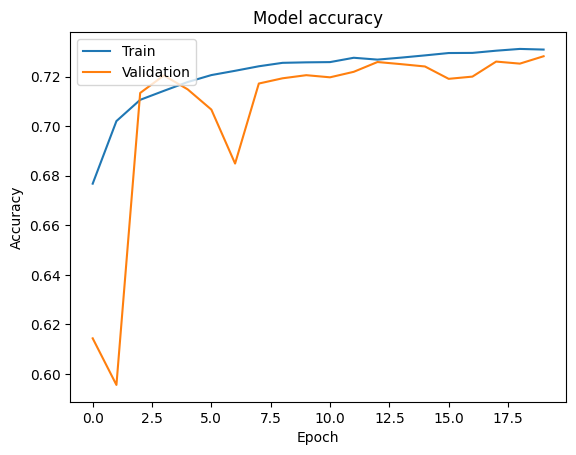

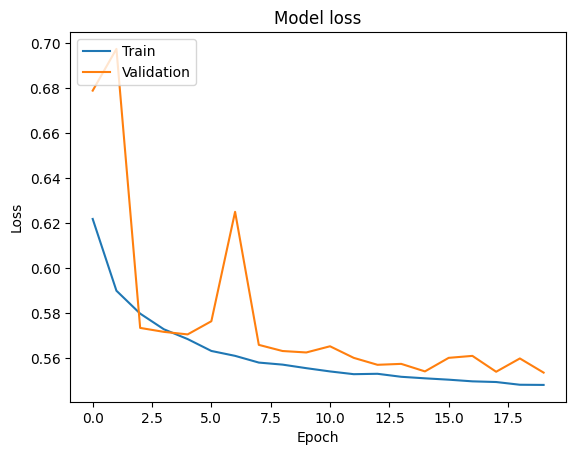

In [5]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()